<a href="https://colab.research.google.com/github/maskot1977/ComputerExercises2022/blob/LwjH5BQAAMoIyD8n/11%E6%9C%888%E6%97%A5%E8%AC%9B%E7%BE%A9%E5%88%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第３９章

In [ ]:
import math
def f(x):
    return math.exp(x) - 3 * x

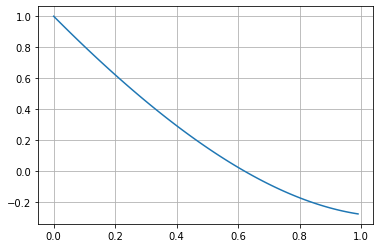

In [ ]:
import matplotlib.pyplot as plt

X = [x / 100 for x in range(0, 100)]
Y = [f(x) for x in X]
plt.plot(X, Y)
plt.grid()
plt.show()

In [ ]:
def chap39(f, a, b, e=0.00001):
    if f(a) * f(b) > 0:
        return False
    
    while abs(f(a) - f(b)) > e:
        c = (a + b) / 2
        if f(c) == 0:
            return c
        elif f(a) * f(c) > 0:
            a = c
        else:
            b = c
    
    return (a + b) / 2    

In [ ]:
chap39(f, 0, 1)

0.6190605163574219

In [ ]:
import timeit

for z in range(1, 8):
    e = 10**(-z)
    x = chap39(f, 0, 1, e=e)
    t = timeit.timeit(lambda: chap39(f, 0, 1, e=e), number=10)
    print(e, x, t)

0.1 0.59375 0.00010288900000432477
0.01 0.62109375 0.000159850000002848
0.001 0.618896484375 0.0002308899999974301
0.0001 0.619049072265625 0.00028178999998829113
1e-05 0.6190605163574219 0.00037542999999118365
1e-06 0.6190612316131592 0.0004194689999934553
1e-07 0.6190612614154816 0.0005189589999901045


# 第４０章

In [ ]:
import math
def f(x):
    return math.exp(x) - 3 * x

def df(x):
    return math.exp(x) - 3

In [ ]:
def chap40(f, df, x, e=0.00001):
    if abs(f(x)) < e:
        return x
    else:
        x2 = x - f(x) / df(x)
        if abs(f(x2)) < e:
            return x2
        else:
            return chap40(f, df, x2, e=e)

In [ ]:
chap40(f, df, 0)

0.6190612833553127

# 第４１章

In [ ]:
def f(x):
    return x / (x**2 + 1)

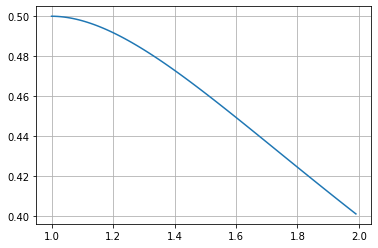

In [ ]:
import matplotlib.pyplot as plt

X = [x / 100 for x in range(100, 200)]
Y = [f(x) for x in X]
plt.plot(X, Y)
plt.grid()
plt.show()

In [ ]:
def chap41(f, x_0=1, x_n=2, h=0.01):
    sum_ = 0
    n = int((x_n - x_0) / h)
    for i in range(1, n + 1):
        x_i = x_0 + h * i
        sum_ += f(x_i) * h
    return sum_

In [ ]:
chap41(f, h=0.00001)

0.4581408659360804

In [ ]:
import timeit

for z in range(1, 8):
    h = 10**(-z)
    x = chap41(f,h=h)
    t = timeit.timeit(lambda: chap41(f, h=h), number=1)
    print(h, x, t)

0.1 0.45304556496413173 7.810000056451827e-06
0.01 0.4576443659569775 7.249999998748535e-05
0.001 0.45809535593707956 0.0003895199999988108
0.0001 0.4581403658370801 0.010942066999973576
1e-05 0.4581408659360804 0.05311608099998466
1e-06 0.4581453159370582 0.25878756400004477
1e-07 0.4581453609370471 2.1343560510000543


# 第４２章

In [ ]:
def chap42(f, x_0=1, x_n=2, h=0.01):
    sum_ = 0
    n = int((x_n - x_0) / h)
    for i in range(1, n + 1):
        x_i = x_0 + h * i
        sum_ += (f(x_i) + f(x_i - h)) * h / 2
    return sum_

In [ ]:
chap42(f)

0.45814436595697755

# 第４３章

In [ ]:
def chap43(f, x_0=1, x_n=2, h=0.01):
    sum_ = 0
    n = int((x_n - x_0) / (h * 2))
    for i in range(1, n+1):
        x_i = x_0 + (2 * i - 1) * h
        sum_ += f(x_i + h) + 4 * f(x_i) + f(x_i - h)
    return sum_ * h / 3

In [ ]:
chap43(f)

0.45814536585747695

# 第４４章

In [ ]:
def dydx(x, y):
    return 2 - y / x

In [ ]:
def chap44(dydx, x_0, y_0, x_end, dt):
    x = x_0
    y = y_0
    t = int((x_end - x_0) / dt)
    for i in range(t):
        y = y + dt * dydx(x, y)
        x = x + dt
    return y

In [ ]:
chap44(dydx, 1, 2, 2, 0.01)

2.497487437185929

# 第４５章

In [ ]:
def chap45(f, x_0, y_0, x_end, h):
    x = x_0
    y = y_0
    t = int((x_end - x_0) / h)
    for i in range(t):
        k1 = h * f(x, y)
        k2 = h * f(x + h/2, y + k1/2)
        k3 = h * f(x + h/2, y + k2/2)
        k4 = h * f(x + h, y + k3)
        k = (k1 + 2 * k2 + 2 * k3 + k4) / 6
        x = x + h
        y = y + k
    return y

In [ ]:
chap45(dydx, 1, 2, 2, 0.01)

2.4999999999999996

# 第４６章

In [ ]:
def distance(x, y):
    return (1 + (x-y)**2)**0.5

In [ ]:
def chap46(H):
    memo = [0, distance(H[0], H[1])]
    for i in range(2, len(H)):
        memo.append(
            min(
                memo[i - 2] + distance(H[i - 2], H[i]),
                memo[i - 1] + distance(H[i - 1], H[i])
            )
        )
    return int(10 * memo[-1]) / 10

In [ ]:
H = [33, 58, 12]
chap46(H)

21.0

In [ ]:
H = [21, 25, 32, 56, 41, 19]
chap46(H)

42.1

In [ ]:
H = [11, 47, 29, 28, 15, 47, 23, 33, 56, 52, 31, 51]
chap46(H)

70.6